### Quantum Computer
![IBM system one](https://cdn.vox-cdn.com/thumbor/XCekKKK5HjdlIm3gK-wXnwDl5FU=/1400x1050/filters:format(jpeg)/cdn.vox-cdn.com/uploads/chorus_asset/file/13675937/46602874791_c009b3def8_o.jpg)

### Superconducting Qubits - Quantum Computer
![IBM fridge](https://www.ibm.com/blogs/research/wp-content/uploads/2020/01/QLA_figure1.jpg)

In [9]:
### Quantum Systems
![quantum chip](./IBM_quantum_systems.jpg)


zsh:1: bad pattern: [quantum


### Superconducting Qubits
![quantum chip](https://6lli539m39y3hpkelqsm3c2fg-wpengine.netdna-ssl.com/wp-content/uploads/2020/09/IBM-Quantum-Hummingbird_700x-675x366.jpg)
![Superconducting Qubits](https://www.zurich.ibm.com/images/st/quantum/superconductingqubit.png)
[more info](https://en.wikipedia.org/wiki/Transmon)

![superposition](https://miro.medium.com/max/2000/1*RASyPLhYA9osp7edAun6eA.png)

### Bloch Sphere
![Bloch Sphere](https://s3.us-south.cloud-object-storage.appdomain.cloud/strapi/d382d3105b154856bcb3a99656954ad2bloch.png)


[bloch interactive](https://javafxpert.github.io/grok-bloch/)

![entanglement](https://miro.medium.com/max/2000/1*qTQHpNE3euvAtKz7igdR5w.png)

# 8 bit register
## [0][0][0][0][0][0][1][1]  = 1 state from 0..255

# 8 Qubits:
## [0..1][0..1][0..1][0..1][0..1][0..1][0..1][0..1] = 2^8 states at the same time

# Classical Gates
![Classical Gates](https://qiskit.org/textbook/ch-states/images/classical_circuit.png)


# Quantum Gates

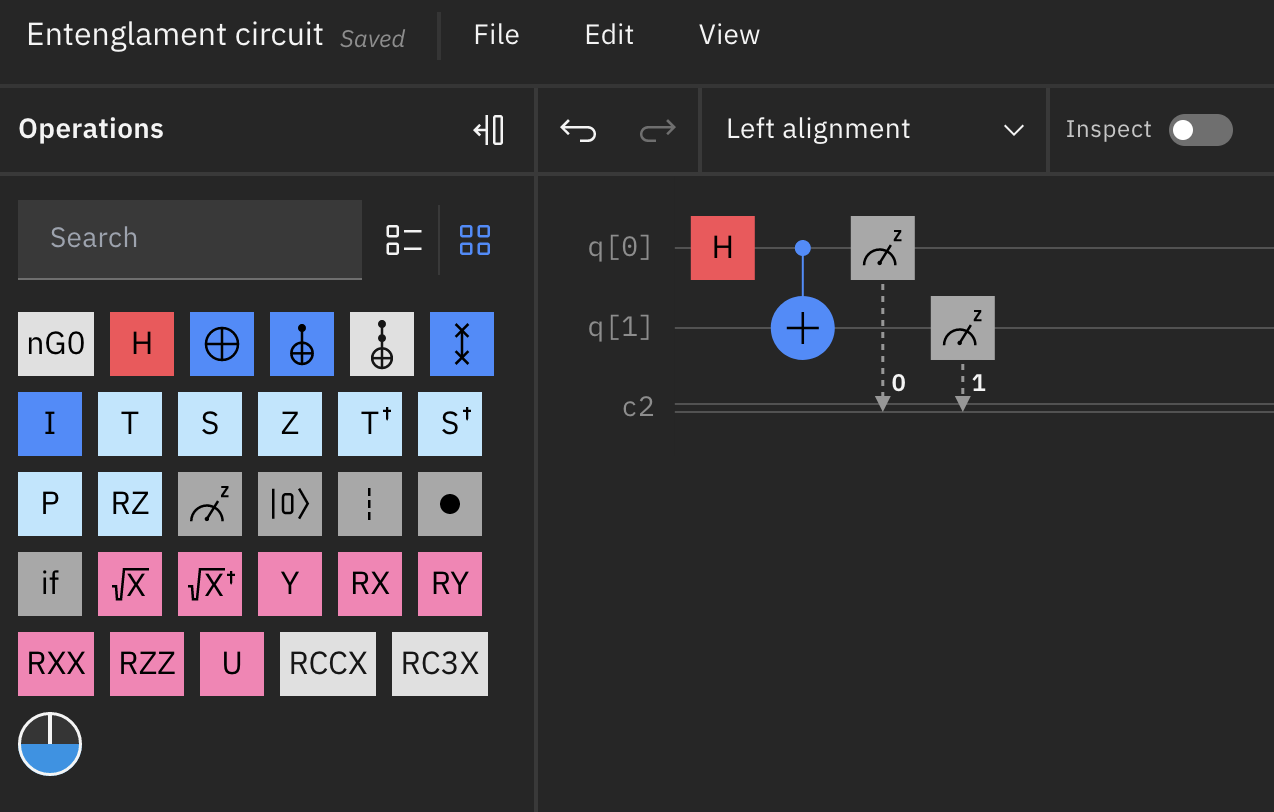
[Quantum Gates](https://quantum-computing.ibm.com/docs/iqx/operations-glossary#h-gate)



# Quantum Circuits
[Circuit Composer](https://quantum-computing.ibm.com/composer/5bf50067d1ee276fe2e39497bbdea3fa)

# Simulator


### Quantum Circuits Class and Gates

```python
qc = QuantumCircuit(5)

qc.x(0)
qc.h(0)
qc.x(1)
qc.rx(0,pi/2)
qc.cx(0,1)
qc.z(0)
qc.h(1)
qc.cx(1,0)
qc.m(0,0)

quantumSimulator =  QuantumSimulator(qc)

result = quantumSimulator.run(1024, "counts")
print(result)
```

```python 
class QuantumCircuit:
    def __init__(self, qubits):
        if (qubits < 1):
            print('Number of Qubits need to be more than 0')
        self.Qubits = qubits
        self.circuit = []
    
    def add_gate(self, gate):
        self.circuit.append(gate)
        
    def x(self, qubit):
        self.add_gate(['x',qubit])
    
    def z(self, qubit):
        self.rz(qubit,pi) 

    def y(self, qubit):
        self.rz(qubit,pi)
        self.x(qubit)
    
    def h(self, qubit):
        self.add_gate(['h',qubit])
```
       

https://qiskit.org/textbook/ch-states/single-qubit-gates.html


```python 
   
    def rx(self, qubit, theta):
        self.add_gate(['rx',qubit, theta])
    
    def ry(self, qubit, theta):
        self.rx(qubit,pi/2)
        self.h(qubit)
        self.rx(qubit,theta)
        self.h(qubit)
        self.rx(qubit,-pi/2)

    def rz(self, qubit, theta):
        self.h(qubit)
        self.rx(qubit,theta)
        self.h(qubit)


```python   
   def cx(self, control, target):
        self.add_gate(['cx',control, target])
        
   def m(self, qubit, target):
        self.add_gate(['m',qubit,target])


### Quantum Simulator Class

```python
class QuantumSimulator:
    def __init__(self, quantum_circuit):
        self.circuit = quantum_circuit.circuit
        self.Qubits =  quantum_circuit.Qubits
        self.state_vector = []
    
    def initialize_state_vector(self):
        self.state_vector = [[0.0,0.0] for _ in range(2**self.Qubits)] 
        self.state_vector[0] = [1.0,0.0] 
        
      

```python
    def run(self, shots=1024, format="statevector"):

            self.initialize_state_vector()
            for gate in self.circuit:
                if gate[0] in ['x','h','rx']:
                    qubit = gate[1]
                    ''' the gates affect elements of the statevector in pairs.
                        These pairs are the elements whose corresponding bit 
                        strings differ only on bit `qubit`.
                        The following loops allow us to loop over all of these pairs.
                        '''
                    for counter_qubit in range(2**qubit):
                        for counter_state in range(int(2**(self.Qubits-qubit-1))):
                            qb0=counter_qubit+(2**qubit+1)*counter_state
                            qb1=qb0+(2**qubit)
                           

```

```python
if gate[0]=='x':
    self.state_vector[qb0], self.state_vector[qb1] = self.state_vector[qb1], \
                                                     self.state_vector[qb0]


```python
qc.x(0)   
''' state vector'''
q1 q0
0  0 = 1+0j >>> Source - qb0
0  1 = 0+0j <<< Target - qb1
1  0 = 0+0j
1  1 = 0+0j


```python
q1 q0
0  0 = 0+0j
0  1 = 1+0j <<<
1  0 = 0+0j
1  1 = 0+0j
```

https://qiskit.org/textbook/ch-states/single-qubit-gates.html


```python
if gate[0]=='h':
    superpositionResult = self.superposition(self.state_vector[qb0],
                                             self.state_vector[qb1])
    self.state_vector[qb0] = superpositionResult[0]
    self.state_vector[qb1] = superpositionResult[1]


```python 
     def superposition(self, x, y):
        '''For two elements of the statevector, x and y, return (x+y)/sqrt(2) 
           and (x-y)/sqrt(2)'''
        return [[r2*(x[0]+y[0]),r2*(x[1]+y[1])],
                [r2*(x[0]-y[0]),r2*(x[1]-y[1])]]
    
    

```python
if gate[0]=='rx':
    theta = gate[2]
    turn = self.turn(self.state_vector[qb0],
                     self.state_vector[qb1],
                     theta)
    
    self.state_vector[qb0] = turn[0]
    self.state_vector[qb1] = turn[1]
```

```python
    def turn(self, x, y, theta):
        '''For two elements of the statevector, x and y, 
           return cos(theta/2)*x - i*sin(theta/2)*y 
           and cos(theta/2)*y - i*sin(theta/2)*x'''

        element1 = [x[0]*cos(theta/2)+y[1]*sin(theta/2),
                 x[1]*cos(theta/2)-y[0]*sin(theta/2)]
        element2 = [y[0]*cos(theta/2)+x[1]*sin(theta/2),
                 y[1]*cos(theta/2)-x[0]*sin(theta/2)]
        return [ element1, element2]
    

```python
elif gate[0] == 'cx':
    control = gate[1]
    target = gate[2]
    [low,high] = sorted([control,target])
     '''This gate only effects elements whose corresponding bit strings
         have a '1' on bit 'control'. Of those, it effects elements in 
         pairs whose corresponding bit strings differ only on bit `target'
         The following loops allow us to loop over all of these pairs.'''
    for cx0 in range(2**low):
        limit_cx2 = 2**(high-low-1)
        for cx1 in range(limit_cx2):
            for cx2 in range(2**(self.Qubits-high-1)):
                qb0 = cx0 + 2**(low+1)*cx1  \
                          + 2**(high+1)*cx2 \
                          + 2**control  
                qb1 = qb0 + 2**target 
                self.state_vector[qb0],self.state_vector[qb1] = \
                           self.state_vector[qb1],self.state_vector[qb0]
                        

```python
    def get_counts(self, shots):
        probabilities = self.probability(shots)
        counts = {}
        for element in probabilities:
            if(element in counts):
                counts[element]+=1
            else:
                counts[element]=1
        return counts
 

```python
def probability(self, shots):
        probabilities = []
        for value in self.state_vector: 
            real_part = value[0]
            imaginary_part = value[1]
            probabilities.append(real_part**2+imaginary_part**2)
        output = []
        for shot in range(shots):
            cumu = 0
            un = True
            r = random.random()
            for index, probability in enumerate(probabilities):
                cumu += probability
                if(r < cumu and un):
                    raw_output = "{0:b}".format(index)
                    raw_output = ("0"*(self.Qubits-len(raw_output))) + raw_output
                    output.append(raw_output)
                    un=False
        return output
   ```

![Quantum Volume](https://miro.medium.com/max/2000/1*OXYrDeSYoObfe3QB07L1mA.jpeg)


### Quantum simulators to learn

####  [Python code](https://github.com/ismaelfaro/py-quantum-simulator)

####  [JS code](https://github.com/ismaelfaro/py-quantum-simulator)

### Other Quantum Resources

#### Composer online: [quantum-computing.ibm.com](http://quantum-computing.ibm.com)

#### medium article: [Programming with Quantum Gates](https://medium.com/@jonathan_hui/qc-programming-with-quantum-gates-8996b667d256)

#### Qiskit, Quantum Open Source SDK: [qiskit.org](http://qiskit.org)

#### Qiskit textbook: [qiskit.org/textbook](http://qiskit.org/textbook)

[quantum executions](https://youtu.be/F4SHY8DCtYs)


## Thank you

#### @ismaelfaro - IBM Quantum Research